In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns


In [2]:
df = pd.read_csv('C:/Users/hafsa/Downloads/train_test_data.csv' )



# Data Exploration and analysis

In [3]:
# shape of the dataset
print('Shape of the data= ', df.shape)


Shape of the data=  (20411, 4)


In [4]:
df.head(5)

,Date,Id_compte,amount_transaction,category_transaction
0,2022-01-01 00:23:00,SEWC_CL.1,462.96,Food & Drink - Groceries
1,2022-01-01 00:26:00,SEW0C_LI.1,15.51,General Services - Home Repair + Maintenance
2,2022-01-01 01:01:00,US.1,2.24,Bank Transfers - ATM withdrawals
3,2022-01-01 01:21:00,TA.1,2.86,Transportation - Public Transport
4,2022-01-01 01:54:00,US.1,1.68,Bank Transfers - ATM withdrawals


In [5]:
# type of each column
print('Column datatypes= \n',df.dtypes)

Column datatypes= 
 Date                     object
Id_compte                object
amount_transaction      float64
category_transaction     object
dtype: object


In [6]:
# statiscs of the amount transaction
df.describe()

,amount_transaction
count,20411.000000
mean,56.955119
std,150.401661
min,0.230000
25%,2.790000
50%,4.700000
75%,8.790000
max,2005.200000


In [7]:
# checking for messing values
missing_values = df.isnull().sum()

# count of missing values  for each column
print("Missing Values:")
print(missing_values)

Missing Values:
Date                    0
Id_compte               0
amount_transaction      0
category_transaction    0
dtype: int64


In [8]:
# Checking for duplicate rows
def display_duplicate_rows(df):
    # Find duplicate rows
    duplicate_rows = df[df.duplicated()]

    # show duplicate rows
    if not duplicate_rows.empty:
        print("Duplicate Rows:")
        print(duplicate_rows)
    else:
        print("No duplicate rows found.")

# display duplicate rows        
display_duplicate_rows(df)

Duplicate Rows:
                      Date  Id_compte  amount_transaction  \
7468   2022-04-24 02:39:00      IPA.1               10.03   
11307  2022-06-21 22:46:00  SEWC_CL.1                5.79   

                   category_transaction  
7468   Bank Transfers - ATM withdrawals  
11307     Food & Drink - Coffee and tea  


In [9]:
# Removing duplicate rows 
df.drop_duplicates(inplace=True)

# checking if there's any other  duplicate rows
display_duplicate_rows(df)

No duplicate rows found.


In [10]:
# Convert the Date column to datetime type to make it easier for the training
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as index column of the dataframe
df.set_index('Date', inplace=True)


# df.drop('Date', axis = 1, inplace = True)
print('Column datatypes= \n',df.dtypes)

Column datatypes= 
 Id_compte                object
amount_transaction      float64
category_transaction     object
dtype: object


In [11]:
df.drop('category_transaction', axis=1, inplace=True)


In [12]:
df.head(5)

,Id_compte,amount_transaction
Date,,
2022-01-01 00:23:00,SEWC_CL.1,462.96
2022-01-01 00:26:00,SEW0C_LI.1,15.51
2022-01-01 01:01:00,US.1,2.24
2022-01-01 01:21:00,TA.1,2.86
2022-01-01 01:54:00,US.1,1.68


# Normalization 

In [13]:
# from sklearn.preprocessing import  MinMaxScaler

# # the goal is to scale the amount_transaction into a standard range

# amount_transaction = df['amount_transaction'].values.reshape(-1, 1)


# scaler_normalization = MinMaxScaler()
# df['amount_transaction'] = scaler_normalization.fit_transform(amount_transaction)

# df.head(5)

In [14]:
df.describe()

,amount_transaction
count,20409.000000
mean,56.959925
std,150.408245
min,0.230000
25%,2.790000
50%,4.700000
75%,8.790000
max,2005.200000


In [15]:
df.head(5)

,Id_compte,amount_transaction
Date,,
2022-01-01 00:23:00,SEWC_CL.1,462.96
2022-01-01 00:26:00,SEW0C_LI.1,15.51
2022-01-01 01:01:00,US.1,2.24
2022-01-01 01:21:00,TA.1,2.86
2022-01-01 01:54:00,US.1,1.68


In [16]:
# plot the average amount transaction of each id compte
# average_amounts = df.groupby('Id_compte')['amount_transaction'].mean().sort_values(ascending=False)

# plt.figure(figsize=(15, 8))
# bar_chart=sns.barplot(y=average_amounts.values, x=average_amounts.index, palette="viridis")

# plt.title('Average Transaction Amount by each id compte')
# plt.xlabel('id compte')
# plt.ylabel('Average Transaction Amount')
# # Rotate x-axis labels for better readability
# bar_chart.set_xticklabels(bar_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.show()

In [17]:
# encoding id compte

from sklearn import preprocessing

# Create a label encoder
le = preprocessing.LabelEncoder()

# Fit and transform 'Id_compte' during training
df['Id_compte_encoded'] = le.fit_transform(df['Id_compte'])

In [18]:
print("Label Encoder Classes before training:", le.classes_)


Label Encoder Classes before training: ['CPA.1' 'CPA_MP.1' 'HP.1' 'IPA.1' 'SEW0C_HI.1' 'SEW0C_LI.1' 'SEWC_CL.1'
 'SEWC_P.1' 'SEWC_PA.1' 'SEWC_P_PL.1' 'TA.1' 'US.1']


In [19]:
df.head(5)

,Id_compte,amount_transaction,Id_compte_encoded
Date,,,
2022-01-01 00:23:00,SEWC_CL.1,462.96,6
2022-01-01 00:26:00,SEW0C_LI.1,15.51,5
2022-01-01 01:01:00,US.1,2.24,11
2022-01-01 01:21:00,TA.1,2.86,10
2022-01-01 01:54:00,US.1,1.68,11


# Visualisation of transaction amounts over time


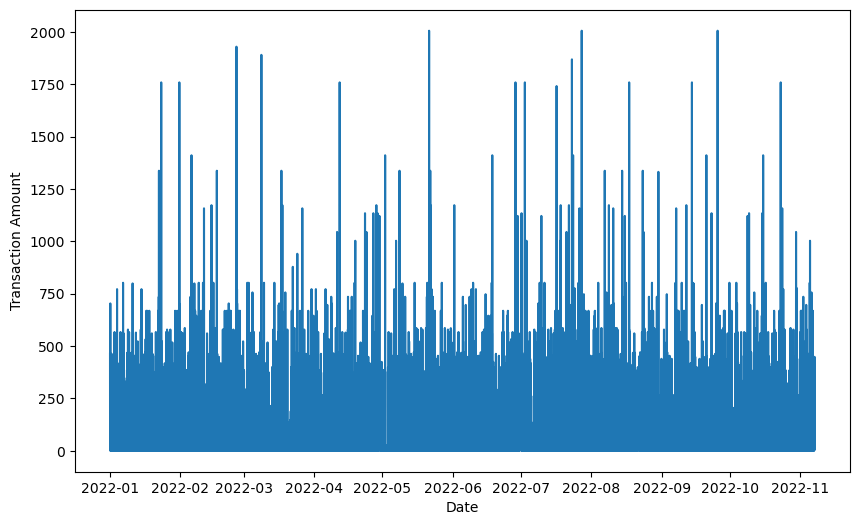

In [20]:
# this chart to visualize the transaction over the months year 2022
plt.figure(figsize= (10,6))
plt.plot(df.index, df['amount_transaction'], label='Transaction Amount')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()

now let's display the seasonality i will break the previous chart into months and days so i can undestand the distrubution of amount transaction over the time

<Axes: title={'center': 'Transactions in 11 month'}, xlabel='Month', ylabel='amount_transaction'>

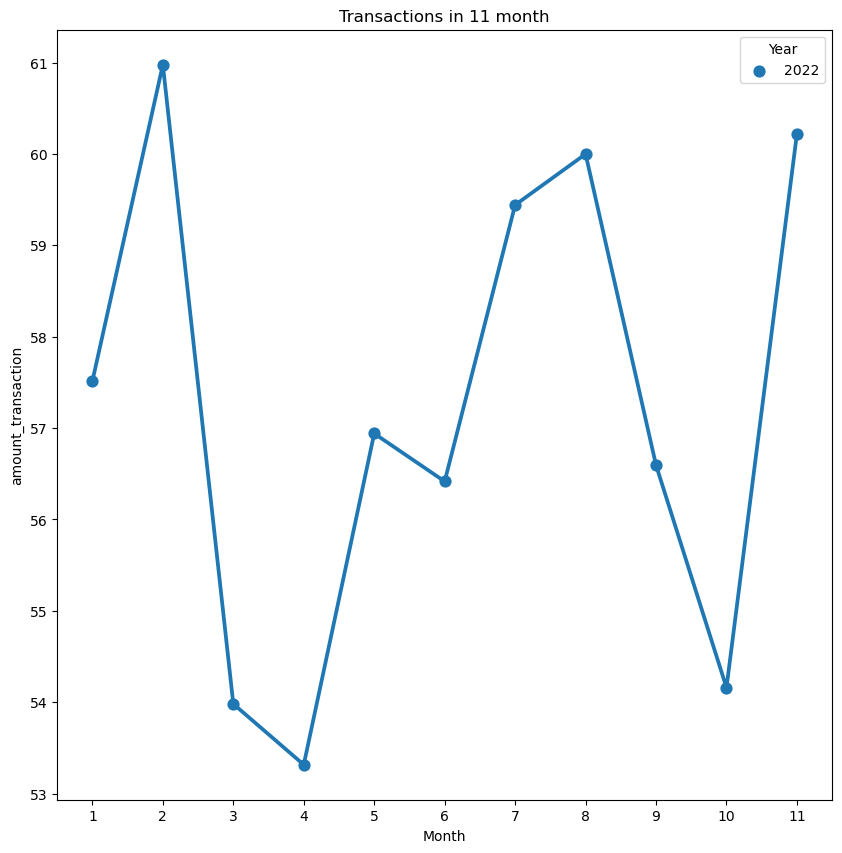

In [21]:
# create a temp dataframe and add columns for Month and Year values
df_temp = df.copy()



df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
df_temp['Day'] = pd.DatetimeIndex(df_temp.index).day
df_temp['Hour'] = pd.DatetimeIndex(df_temp.index).hour

plt.figure(figsize=(10,10))
plt.title('Transactions in 11 month')
sns.pointplot(x='Month',y='amount_transaction',hue='Year',data=df_temp , errorbar=None)

here we can see that february has the higher amount transaction even though he's the shortest month of the year

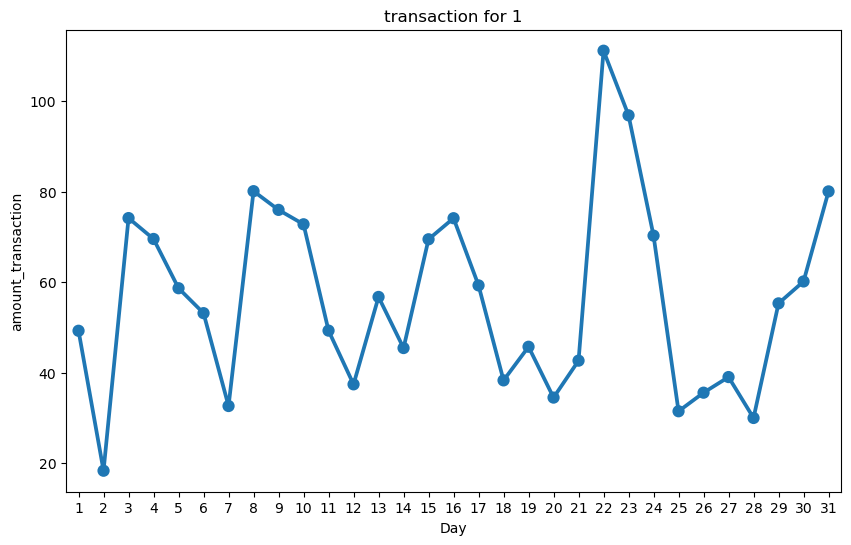

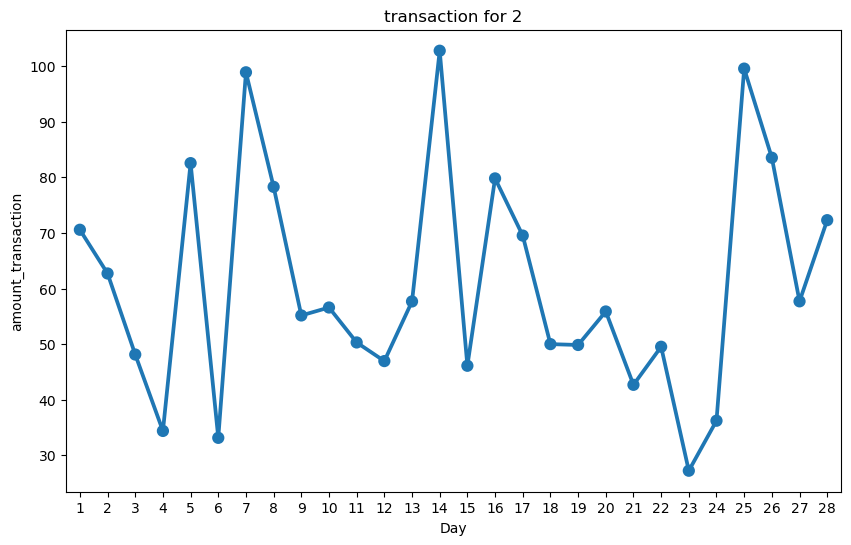

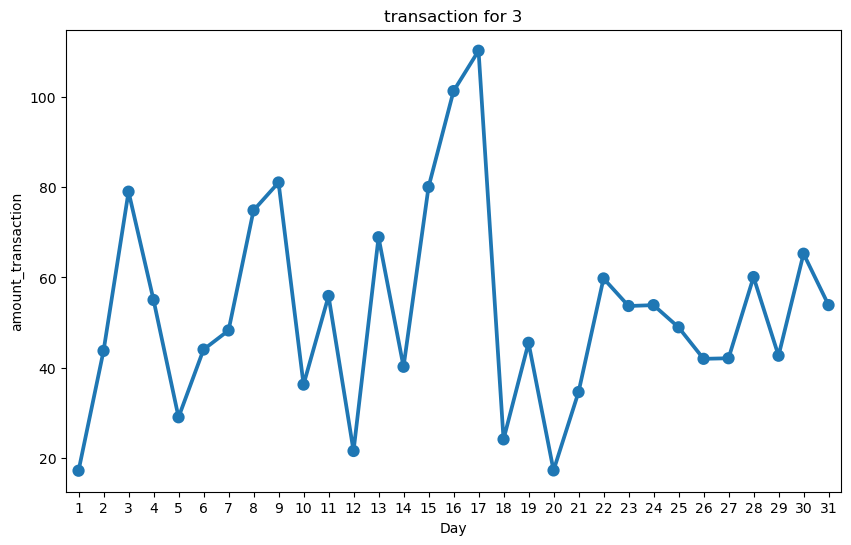

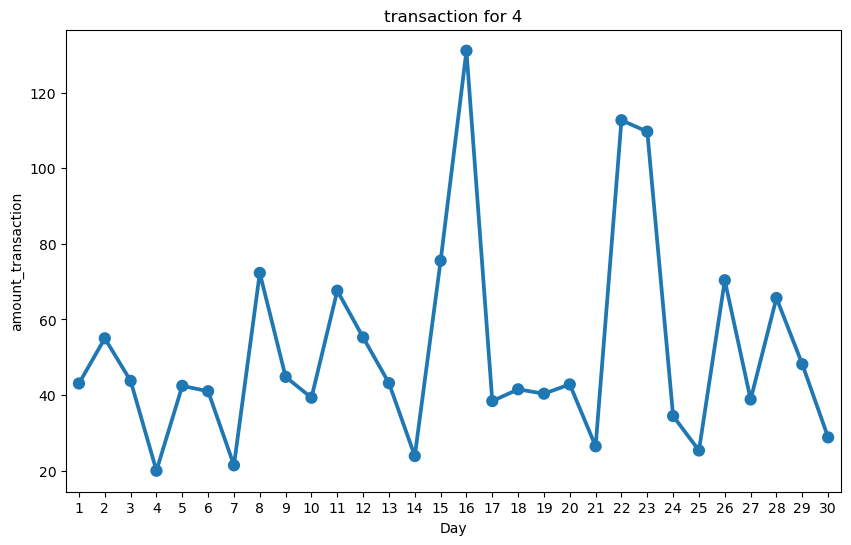

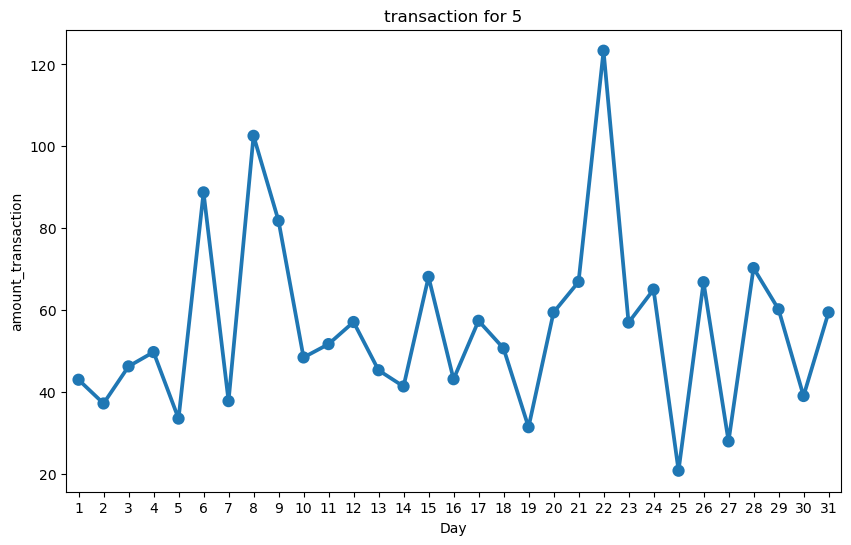

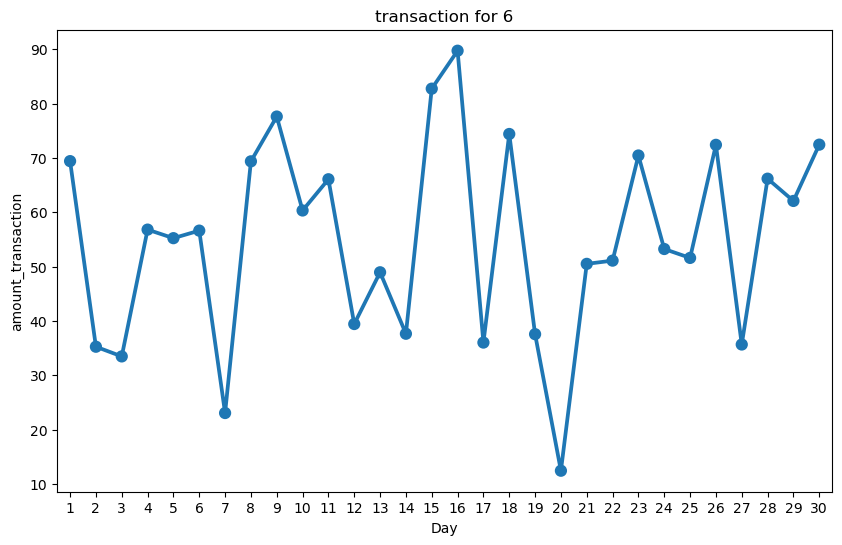

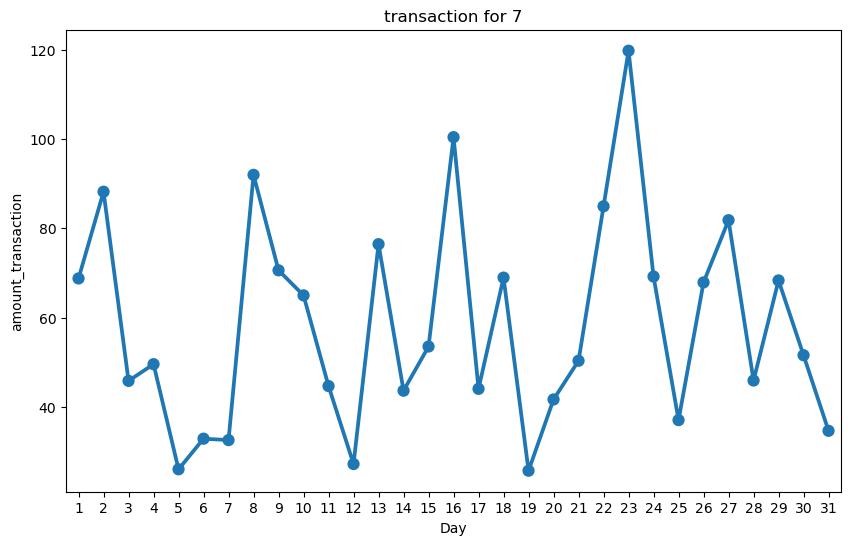

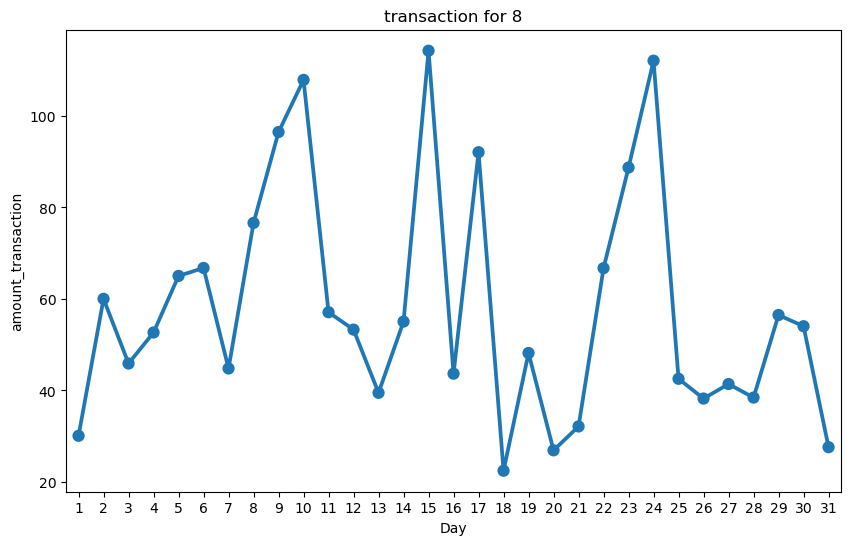

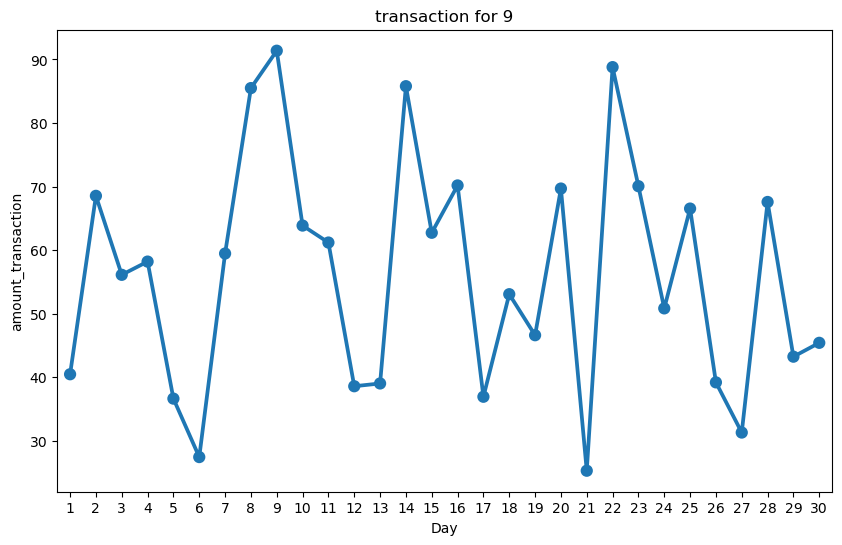

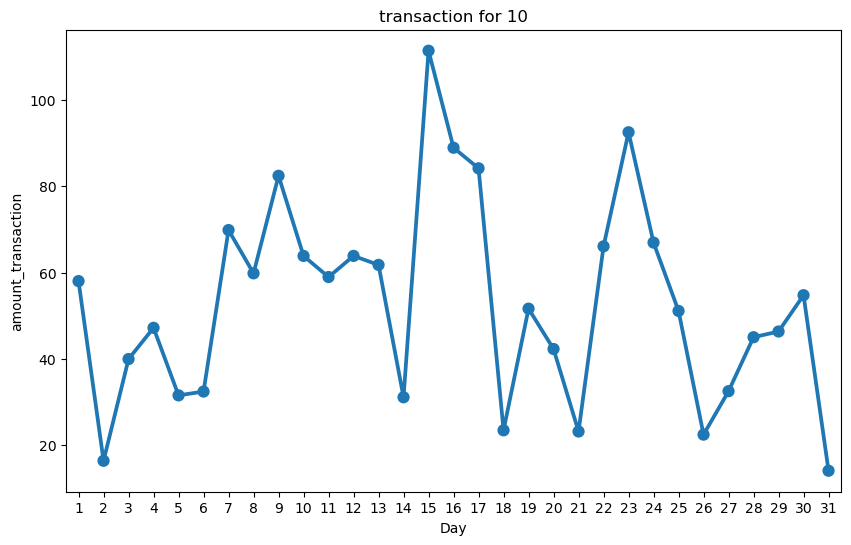

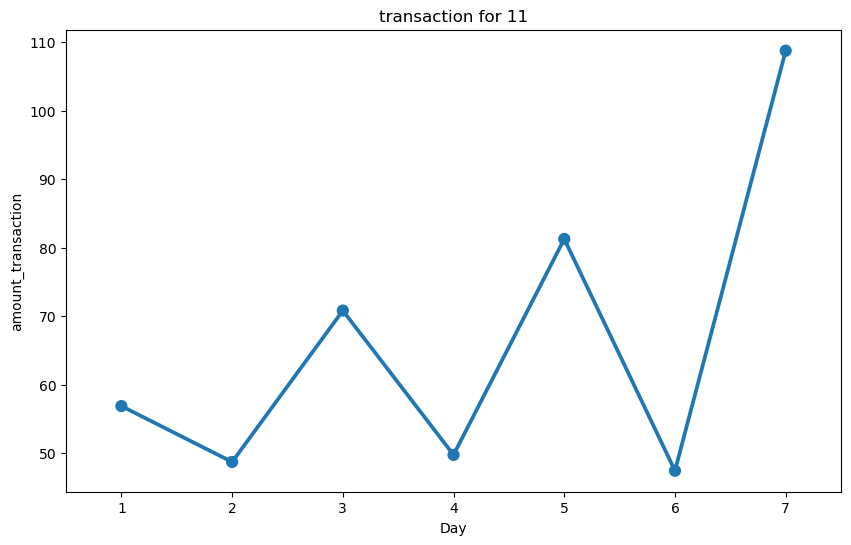

In [22]:
# plot the transaction of each month

for month in df_temp['Month'].unique():
    df_month = df_temp[df_temp['Month'] == month]
    plt.figure(figsize=(10, 6))
    plt.title(f'transaction for {month}')
    sns.pointplot(x='Day', y='amount_transaction', data=df_month , errorbar=None)
    plt.show()




After ploting the previous chart we can see that the distribution we can see that it's not stationary
In the following code i will try  to make it more stationary using different methods

In [23]:
#  the Differencing method
df_temp['amount_transaction_diff'] = df_temp['amount_transaction'].diff()

#  the Log transformation method
df_temp['amount_transaction_log'] = np.log1p(df_temp['amount_transaction_diff'])



C:\Users\hafsa\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hafsa\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


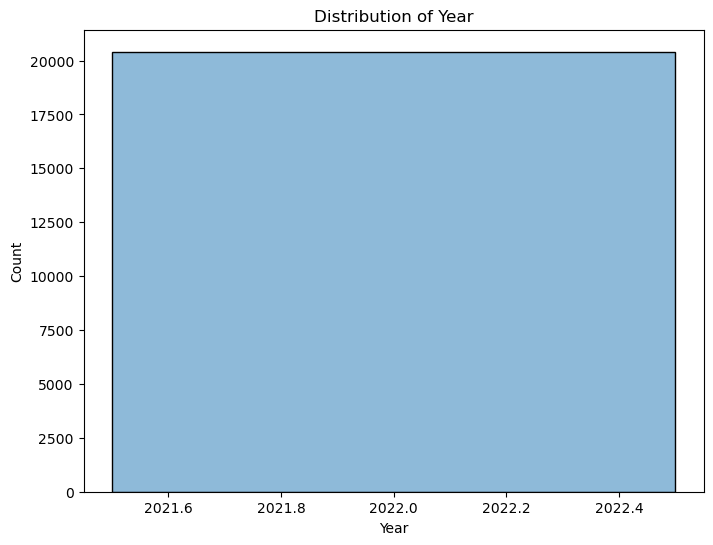

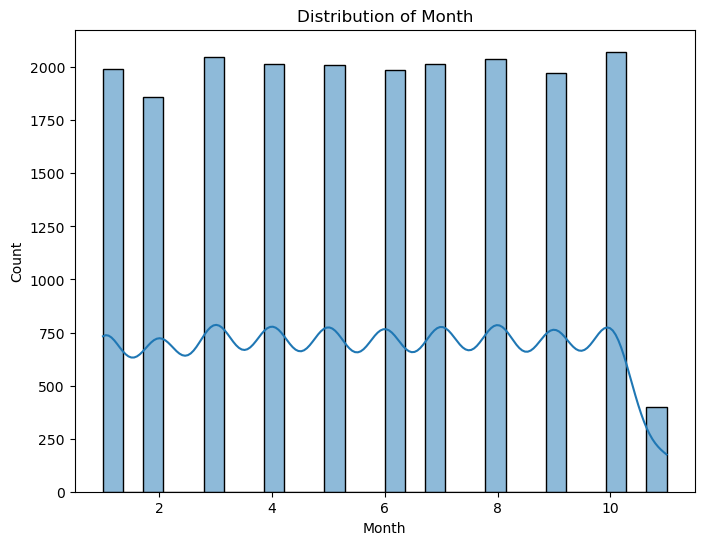

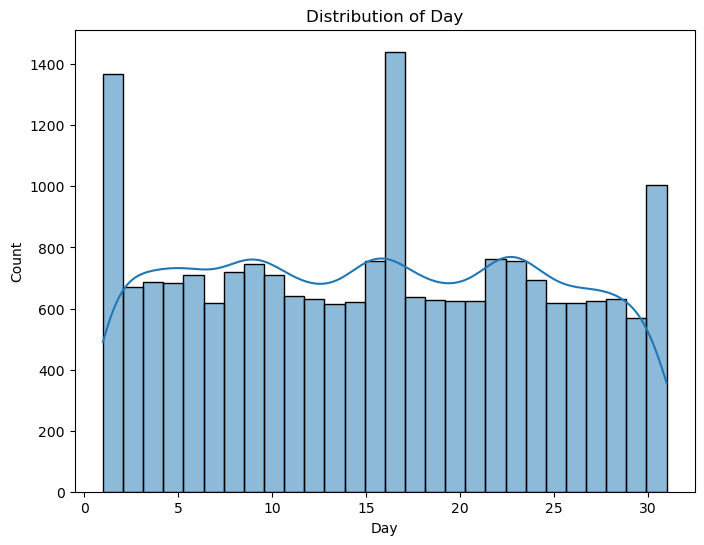

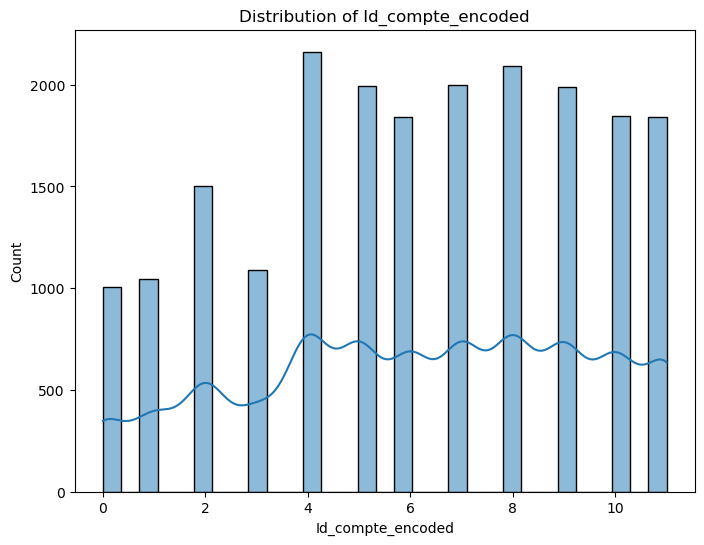

In [24]:
#  features selection
features = ['Year', 'Month', 'Day', 'Id_compte_encoded']
target = 'amount_transaction'

# Visualize the distribution of each selected feature
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_temp[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [25]:
# Model Selection 
# 80% for the training 
train_size = int(len(df_temp) * 0.8)
train, test = df_temp[:train_size], df_temp[train_size:]

for this task i choosed to work with  RandomForestRegressor because of the following reasons :
    -can capture complex relationships and non-linear patterns in the data
    -reduces the risk of overfitting that is often associated with individual decision trees. 
    -easy to use and require minimal hyperparameter tuning compared to some other complex models.
    -robust to outliers and noise in the data


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.metrics import mean_squared_error


X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

In [27]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


# Set up Time Series Cross-Validation with 10 splits

tscv = TimeSeriesSplit(n_splits=10)  

# cross-validation using the Random Forest Regressor
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')


In [28]:
# Convert the negative MSE scores to positive and calculate RMSE
rmse_scores = np.sqrt(-cv_scores)

# RMSE scores for each fold
print("RMSE Scores:", rmse_scores)

# Calculate and print the mean RMSE
mean_rmse = np.mean(rmse_scores)
print("Mean RMSE:")
print(mean_rmse)
rf_model.fit(X_train, y_train)

RMSE Scores: [181.39254867 166.70916748 154.21254398 163.30515098 159.04457339
 151.78270279 158.93828823 166.15939974 181.28898019 160.26352029]
Mean RMSE:
164.3096875732551


RandomForestRegressor(random_state=42)

In [29]:
# Prediction on the test set
predicted_values = rf_model.predict(X_test)


In [30]:
#  calculate the Mean Squared Error (MSE)
MSE = mean_squared_error(y_test, predicted_values)
print('Mean Squared Error:', MSE)

Mean Squared Error: 24712.987310383247


In [32]:

import itertools

# combine date and 'Id_compte'
date_range = pd.date_range(start='2022-11-08', end='2022-12-31', freq='D')
id_comptes = df['Id_compte'].unique()
combinations = list(itertools.product(date_range, id_comptes))

# this is  a DataFrame for the combinations
future_data = pd.DataFrame(combinations, columns=['Date', 'Id_compte'])

future_data['Year'] = future_data['Date'].dt.year
future_data['Month'] = future_data['Date'].dt.month
future_data['Day'] = future_data['Date'].dt.day

# Encoding 'Id_compte' in the future_data DataFrame
future_data['Id_compte_encoded'] = le.transform(future_data['Id_compte'])

#  Prediction
predicted_values_normalized = rf_model.predict(future_data[['Year', 'Month', 'Day', 'Id_compte_encoded']])

# Inverse Transform the Predictions
# predicted_values = scaler_normalization.inverse_transform(predicted_values_normalized.reshape(-1, 1)).flatten()

# Create a DataFrame for the Predictions
output = pd.DataFrame({
    'Date': future_data['Date'],
    'Id_compte_encoded': future_data['Id_compte_encoded'],
    'Predicted_Amount': predicted_values_normalized,
})

# Inverse transform the encoded 'Id_compte_encoded' values
output['Id_compte'] = le.inverse_transform(output['Id_compte_encoded'])


# Convert 'Id_compte_encoded' to string before concatenating
output['ID'] = output['Date'].dt.strftime('%Y-%m-%d') + '_' + output['Id_compte'].astype(str)


output['ID'] = output['ID'].str.upper()
output['ID'] = output['ID'].str.strip()


# Save the final output data with the correct 'ID' format to a CSV file
output.to_csv('Predictions.csv', columns=['ID', 'Predicted_Amount'], index=False)



In [33]:
print(date_range)


DatetimeIndex(['2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11',
               '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19',
               '2022-11-20', '2022-11-21', '2022-11-22', '2022-11-23',
               '2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27',
               '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-03', '2022-12-04', '2022-12-05',
               '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09',
               '2022-12-10', '2022-12-11', '2022-12-12', '2022-12-13',
               '2022-12-14', '2022-12-15', '2022-12-16', '2022-12-17',
               '2022-12-18', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[n